<a href="https://colab.research.google.com/github/haradats/pandasNotebook/blob/main/pandasNote05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy import stats

# 区間の集計

## サンプルデータの作成

,Norm,LogNorm
count,10000.000000,10000.000000
mean,-0.013276,1.633269
std,1.000707,2.527612
min,-3.815649,0.021351
25%,-0.674704,0.511557
50%,-0.009229,0.992771
75%,0.646975,1.889324
max,3.793613,128.087218


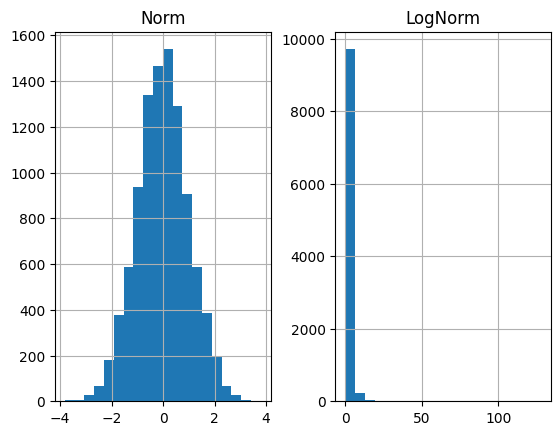

In [ ]:
df = pd.DataFrame()
df['Norm'] = stats.norm.rvs(loc=0,scale=1,size=10000)
df['LogNorm'] = stats.lognorm.rvs(loc=0,s=1,size=10000)
df.hist(bins=20)
df.describe()

## 区間毎のデータ個数の作成

In [ ]:
B = df['Norm'].value_counts(bins=20)
B

,count
"(-0.011, 0.369]",1539
"(-0.391, -0.011]",1468
"(-0.772, -0.391]",1337
"(0.369, 0.75]",1289
"(-1.152, -0.772]",936
"(0.75, 1.13]",908
"(-1.533, -1.152]",589
"(1.13, 1.511]",588
"(1.511, 1.891]",386
"(-1.913, -1.533]",377


In [ ]:
### SeriesオブジェクトBをインデックスの順に整列

In [ ]:
B.sort_index(inplace=True)
B

,count
"(-3.824, -3.435]",4
"(-3.435, -3.055]",7
"(-3.055, -2.674]",26
"(-2.674, -2.294]",67
"(-2.294, -1.913]",182
"(-1.913, -1.533]",377
"(-1.533, -1.152]",589
"(-1.152, -0.772]",936
"(-0.772, -0.391]",1337
"(-0.391, -0.011]",1468


In [ ]:
B.index[0]

Interval(-3.824, -3.435, closed='right')

In [ ]:
B.max()   # 最頻値

1539

## Intervalオブジェクト

In [ ]:
iv = pd.Interval(1, 2, closed='neither')
iv

Interval(1, 2, closed='neither')

In [ ]:
print(iv)

(1, 2)


### 注意）上のオブジェクトはタプルではない！

In [ ]:
1.5 in iv

True

In [ ]:
3 in iv

False

In [ ]:
1 in iv

False

In [ ]:
2 in iv

False

## matplotlibによる作図処理

# データの可視化

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.arange(-2, 2, 0.05)

In [ ]:
y = x**2

<function matplotlib.pyplot.show(close=None, block=None)>

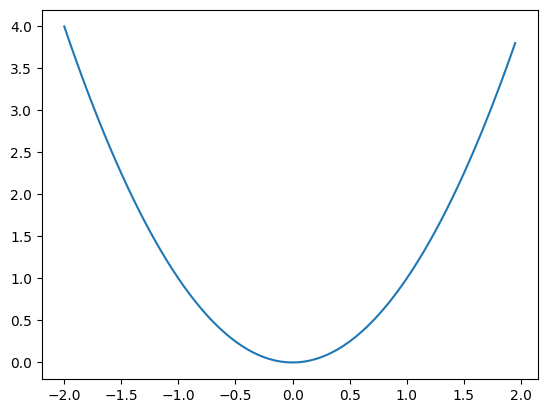

In [ ]:
plt.plot(x, y)
plt.show

# より正しい手順

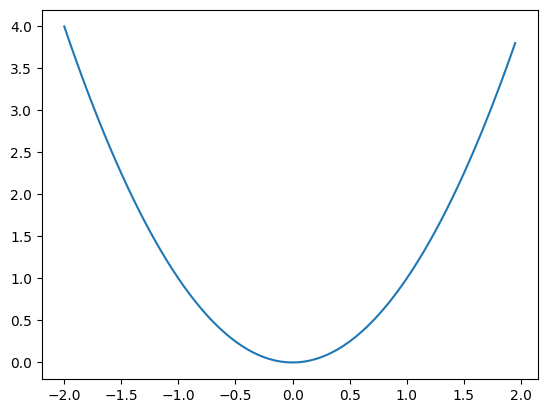

In [ ]:
plt.figure()
plt.plot(x, y)
plt.show()

### グラフを画像データファイルとして保存する

In [ ]:
fname = r'/content/drive/MyDrive/Colab Notebooks' + r'/testFig01.png'
fname

'/content/drive/MyDrive/Colab Notebooks/testFig01.png'

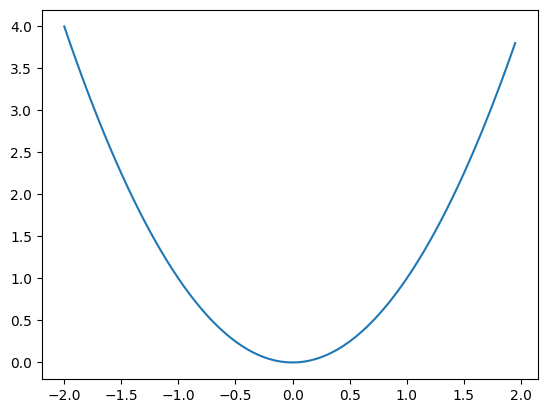

In [ ]:
plt.figure()   # 描画の準備処理
plt.plot(x, y)
plt.savefig(fname)
plt.show()

## pandasの応用

In [ ]:
fname = r'/content/drive/MyDrive/Colab Notebooks' + r'/testFig02.png'
fname

'/content/drive/MyDrive/Colab Notebooks/testFig02.png'

<Figure size 640x480 with 0 Axes>

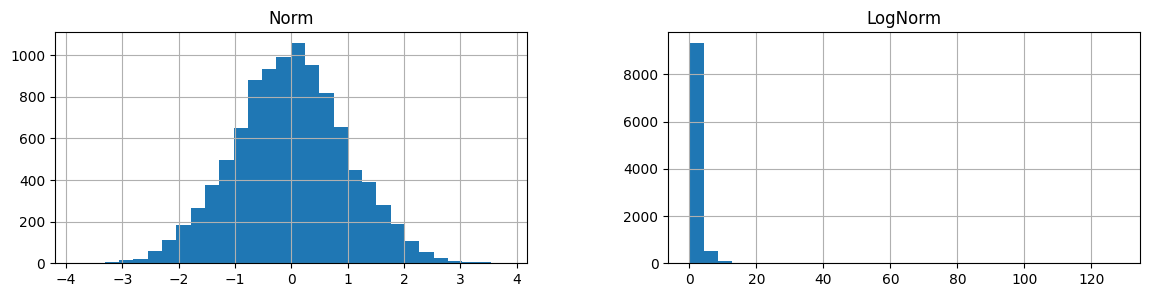

In [ ]:
plt.figure()   # 描画の準備処理
df.hist(bins=30, figsize=(14,3))
plt.savefig(fname)
plt.show()

### グラフを重ねてプロットする方法

In [ ]:
fname = r'/content/drive/MyDrive/Colab Notebooks' + r'/testFig03.png'
fname

'/content/drive/MyDrive/Colab Notebooks/testFig03.png'

<function matplotlib.pyplot.show(close=None, block=None)>

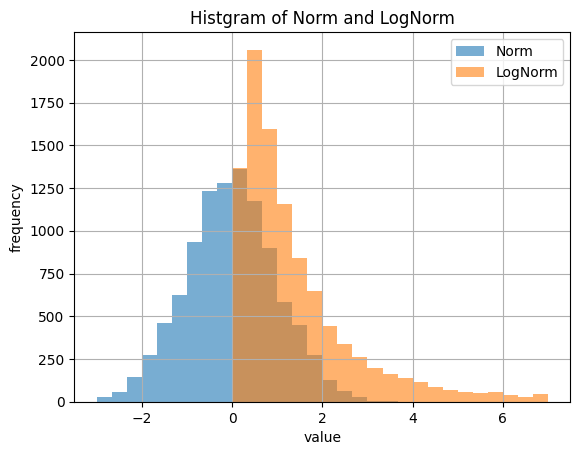

In [ ]:
plt.figure()   # 描画の準備処理
df['Norm'].hist(bins=30, alpha=0.6, range=(-3,7), label='Norm')
df['LogNorm'].hist(bins=30, alpha=0.6, range=(-3,7), label='LogNorm')
plt.xlabel('value')
plt.ylabel('frequency')
plt.legend()
plt.title('Histgram of Norm and LogNorm')
plt.legend(['Norm', 'LogNorm'])
plt.savefig(fname)   # 図の保存
plt.show   # 描画の実行

### 日本語フォントを使用するための準備

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 34.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0cecbd7faf42abffa32eb31ff81f6855f63b43eeabc39a4f7223ac1d7d2752c9
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

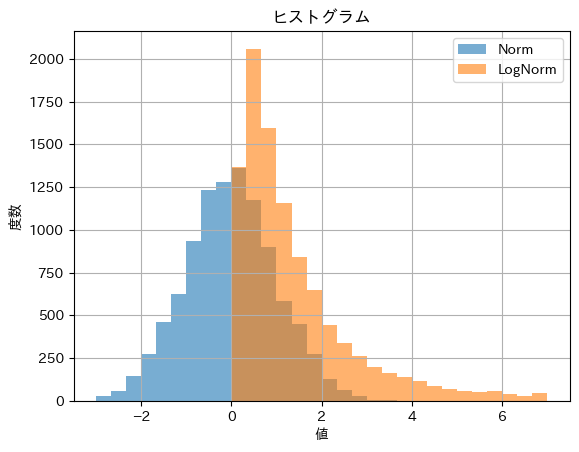

In [ ]:
plt.figure()   # 描画の準備処理
df['Norm'].hist(bins=30, alpha=0.6, range=(-3,7), label='正規分布')
df['LogNorm'].hist(bins=30, alpha=0.6, range=(-3,7), label='対数正規分布')
plt.xlabel('値')
plt.ylabel('度数')
plt.legend()
plt.title('ヒストグラム')
plt.legend(['Norm', 'LogNorm'])
plt.savefig(fname)   # 図の保存
plt.show   # 描画の実行

## 箱ひげ図

<Axes: >

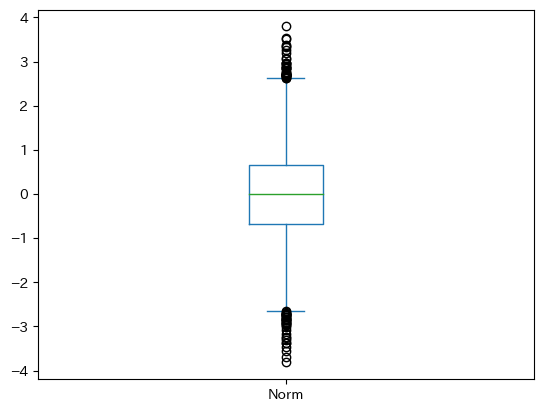

In [ ]:
df['Norm'].plot(kind='box')

<Axes: >

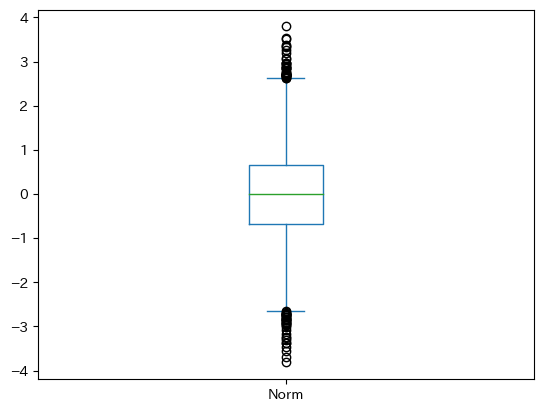

In [ ]:
df['Norm'].plot.box()

<Axes: >

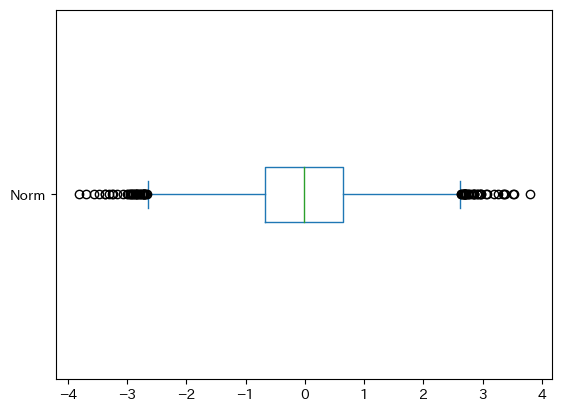

In [ ]:
df['Norm'].plot.box(vert=False)

<Axes: >

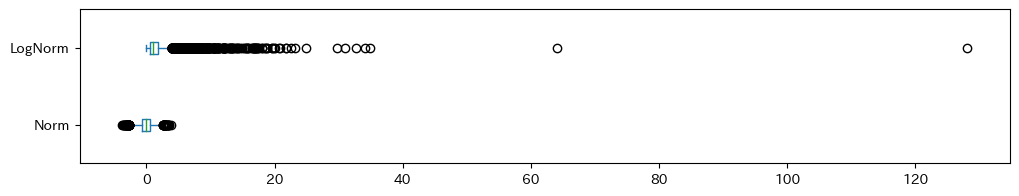

In [ ]:
df.plot.box(vert=False, figsize=(12,2))